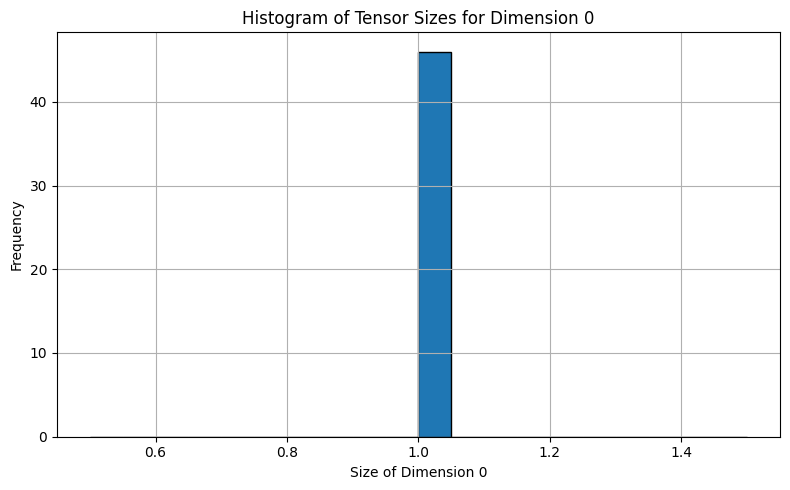

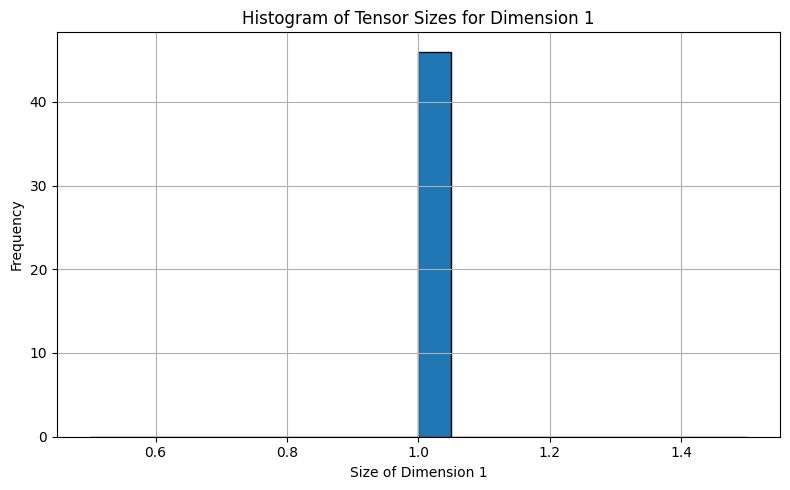

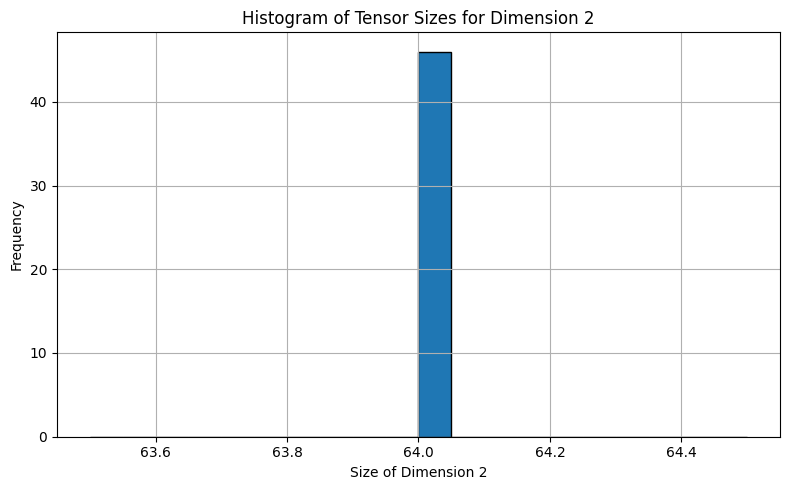

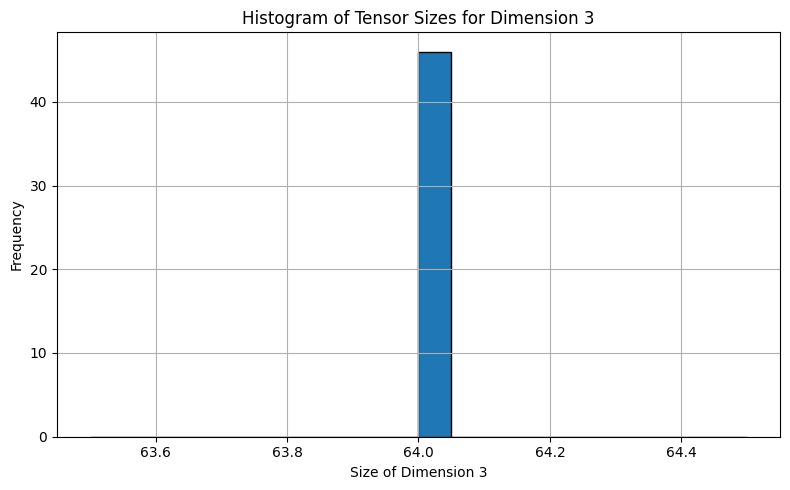

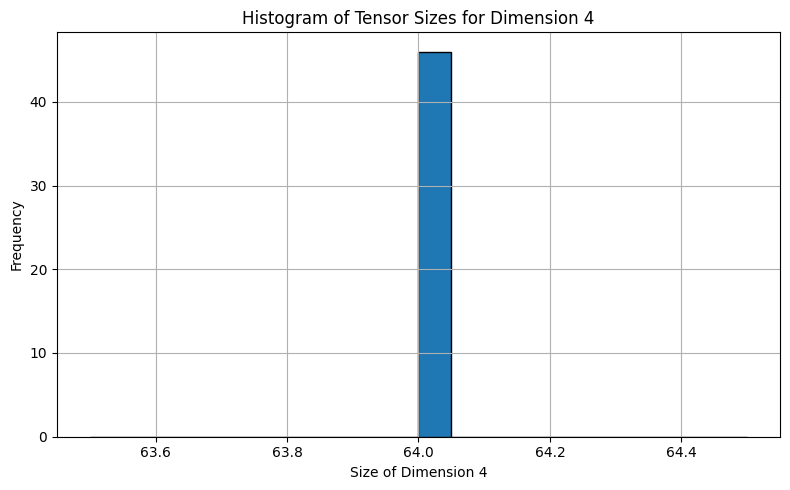

In [1]:
import torch
from pathlib import Path
import matplotlib.pyplot as plt

def load_tensors_from_folder(folder_path: Path) -> list[torch.Tensor]:
    """
    Load all tensors from a specified folder.

    Args:
        folder_path (Path): Path to the folder containing tensor files.

    Returns:
        list[torch.Tensor]: List of loaded tensors.
    """
    tensors = []
    for tensor_file in folder_path.glob("*.pt"):
        tensor = torch.load(tensor_file, weights_only=False)  # Ustaw weights_only=False
        tensors.append(tensor)
    return tensors

def plot_tensor_dimension_histograms(tensors: list[torch.Tensor]) -> None:
    """
    Plot histograms for each dimension of the tensors.

    Args:
        tensors (list[torch.Tensor]): List of tensors to analyze.
    """
    if not tensors:
        print("No tensors found to analyze.")
        return

    # Collect dimensions for each tensor
    dimensions = [tensor.shape for tensor in tensors]

    # Transpose the list of dimensions to group by each axis
    dimensions_by_axis = list(zip(*dimensions))

    # Plot histogram for each axis
    for i, axis_dims in enumerate(dimensions_by_axis):
        plt.figure(figsize=(8, 5))
        plt.hist(axis_dims, bins=20, edgecolor="black")
        plt.title(f"Histogram of Tensor Sizes for Dimension {i}")
        plt.xlabel(f"Size of Dimension {i}")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    # Path to the folder containing tensor files
    folder_path = Path("/home/mateusz/PW/INZ/vertabrae_cls/data/processed/tensors")

    # Load tensors
    tensors = load_tensors_from_folder(folder_path)

    # Plot histograms for tensor dimensions
    plot_tensor_dimension_histograms(tensors)

In [2]:
%matplotlib inline


In [ ]:
import torch
from pathlib import Path
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, Dropdown, VBox, fixed


def load_tensor(file_path: Path) -> torch.Tensor:
    """
    Load a tensor from a specified file.
 
    Args:
        file_path (Path): Path to the tensor file.

    Returns:
        torch.Tensor: Loaded tensor.
    """
    return torch.load(file_path, weights_only=False)  # Ustaw weights_only=False

def plot_slice(tensor: torch.Tensor, axis: str, index: int):
    """
    Plot a single slice of the tensor along the specified axis.

    Args:
        tensor (torch.Tensor): The 3D tensor to visualize.
        axis (str): Axis along which to slice ('x', 'y', or 'z').
        index (int): Index of the slice.
    """
    plt.figure(figsize=(8, 8))
    if axis == 'x':
        plt.imshow(tensor[index, :, :].cpu().numpy(), cmap='gray')
        plt.title(f"Slice along X-axis at index {index}")
    elif axis == 'y':
        plt.imshow(tensor[:, index, :].cpu().numpy(), cmap='gray')
        plt.title(f"Slice along Y-axis at index {index}")
    elif axis == 'z':
        plt.imshow(tensor[:, :, index].cpu().numpy(), cmap='gray')
        plt.title(f"Slice along Z-axis at index {index}")
    plt.axis('off')
    plt.show()

def visualize_tensor(tensor: torch.Tensor):
    """
    Visualize a 3D tensor with interactive sliders.

    Args:
        tensor (torch.Tensor): The 3D tensor to visualize.
    """
    def update(axis, index):
        plot_slice(tensor, axis, index)

    axis_dropdown = Dropdown(
        options=['x', 'y', 'z'],
        value='z',
        description='Axis:',
    )

    def update_slider(axis):
        if axis == 'x':
            return IntSlider(min=0, max=tensor.shape[0] - 1, step=1, value=tensor.shape[0] // 2, description='Slice:')
        elif axis == 'y':
            return IntSlider(min=0, max=tensor.shape[1] - 1, step=1, value=tensor.shape[1] // 2, description='Slice:')
        elif axis == 'z':
            return IntSlider(min=0, max=tensor.shape[2] - 1, step=1, value=tensor.shape[2] // 2, description='Slice:')

    def interactive_plot(axis):
        slider = update_slider(axis)
        interact(update, axis=fixed(axis), index=slider)

    interact(interactive_plot, axis=axis_dropdown)

def select_and_visualize_tensor(folder_path: Path):
    """
    Allow the user to select a tensor file from a folder and visualize it.

    Args:
        folder_path (Path): Path to the folder containing tensor files.
    """
    tensor_files = list(folder_path.glob("*.pt"))
    if not tensor_files:
        print("No tensor files found in the specified folder.")
        return

    tensor_dropdown = Dropdown(
        options=[str(file) for file in tensor_files],
        description='Tensor:',
    )

    def load_and_visualize(file_path):
        tensor = load_tensor(Path(file_path))
        if tensor.ndim != 3:
            print("The selected tensor is not 3D.")
            return
        visualize_tensor(tensor)

    interact(load_and_visualize, file_path=tensor_dropdown)

# Example usage
folder_path = Path("/home/mateusz/PW/INZ/vertabrae_cls/data/processed/tensors")
select_and_visualize_tensor(folder_path)

interactive(children=(Dropdown(description='Tensor:', options=('/home/mateusz/PW/INZ/vertabrae_cls/data/proces…

In [8]:
import torch
from pathlib import Path
import matplotlib.pyplot as plt
from ipywidgets import Dropdown, IntSlider, VBox, interactive_output
from IPython.display import display

def load_tensor(file_path: Path) -> torch.Tensor:
    """
    Load a tensor from a specified file.
    """
    return torch.load(file_path, weights_only=False)

def plot_slice(tensor: torch.Tensor, axis: str, index: int):
    """
    Plot a single slice of the tensor along the specified axis.
    """
    plt.figure(figsize=(6, 6))
    if axis == 'x':
        plt.imshow(tensor[index, :, :].cpu().numpy(), cmap='gray')
        plt.title(f"Slice along X-axis at index {index}")
    elif axis == 'y':
        plt.imshow(tensor[:, index, :].cpu().numpy(), cmap='gray')
        plt.title(f"Slice along Y-axis at index {index}")
    elif axis == 'z':
        plt.imshow(tensor[:, :, index].cpu().numpy(), cmap='gray')
        plt.title(f"Slice along Z-axis at index {index}")
    plt.axis('off')
    plt.show()

def visualize_tensor(tensor: torch.Tensor):
    """
    Visualize a tensor using dropdown for axis and a dynamic slider.
    """
    axis_dropdown = Dropdown(
        options=['x', 'y', 'z'],
        value='z',
        description='Axis:'
    )

    slice_slider = IntSlider(
        description='Slice:',
        min=0,
        max=tensor.shape[2] - 1,
        value=tensor.shape[2] // 2
    )

    def update_slider_range(*args):
        axis = axis_dropdown.value
        if axis == 'x':
            slice_slider.max = tensor.shape[0] - 1
        elif axis == 'y':
            slice_slider.max = tensor.shape[1] - 1
        elif axis == 'z':
            slice_slider.max = tensor.shape[2] - 1
        slice_slider.value = slice_slider.max // 2

    axis_dropdown.observe(update_slider_range, names='value')

    def update(axis, index):
        plot_slice(tensor, axis, index)

    out = interactive_output(update, {'axis': axis_dropdown, 'index': slice_slider})
    display(VBox([axis_dropdown, slice_slider, out]))

def select_tensor_and_visualize(folder_path: Path):
    """
    Let the user select a tensor file and visualize it interactively.
    """
    tensor_files = list(folder_path.glob("*.pt"))
    if not tensor_files:
        print("No .pt tensor files found in folder.")
        return

    file_dropdown = Dropdown(
        options=[str(f) for f in tensor_files],
        description='File:'
    )

    def load_and_show(path):
        tensor = load_tensor(Path(path)).squeeze()
        if tensor.ndim != 3:
            print("Selected tensor is not 3D.")
            return
        visualize_tensor(tensor)

    display(file_dropdown)
    file_dropdown.observe(lambda change: load_and_show(change['new']), names='value')

# 🔧 Ustaw folder docelowy
folder_path = Path("/home/mateusz/PW/INZ/vertabrae_cls/data/processed/tensors")
select_tensor_and_visualize(folder_path)


Dropdown(description='File:', options=('/home/mateusz/PW/INZ/vertabrae_cls/data/processed/tensors/00038.pt', '…

In [7]:
def load_tensor(file_path: Path) -> torch.Tensor:
    """
    Load a tensor from a specified file.
    """
    return torch.load(file_path, weights_only=False)

tensor = load_tensor(Path("/home/mateusz/PW/INZ/vertabrae_cls/data/processed/tensors/00001.pt"))  # Ustaw ścieżkę do pliku tensoru
tensor.shape

torch.Size([1, 1, 64, 64, 64])